In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt

In [2]:
import numpy as np
from numpy import pi

## Showing potential lines

In [3]:
np.arange(0, 1., 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [4]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [5]:
x, y = np.mgrid[0:1:10j, 0:1:5j]

<IPython.core.display.Javascript object>


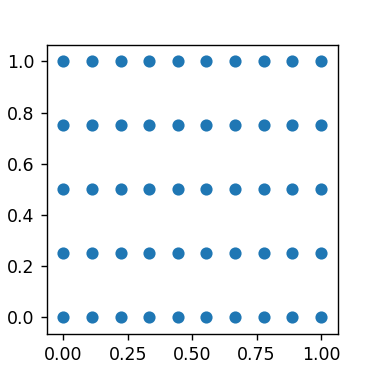

In [6]:
plt.figure(figsize=(3,3))
plt.scatter(x, y)

In [7]:
x, y = np.mgrid[-3:3:50j, -3:3:50j]

In [8]:
phi = 1.0/(4*pi)*np.log(x*x + y*y)

<IPython.core.display.Javascript object>


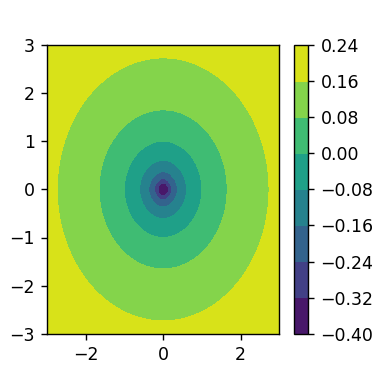

In [9]:
plt.figure(figsize=(3,3))
plt.contourf(x, y, phi); plt.colorbar();

<IPython.core.display.Javascript object>


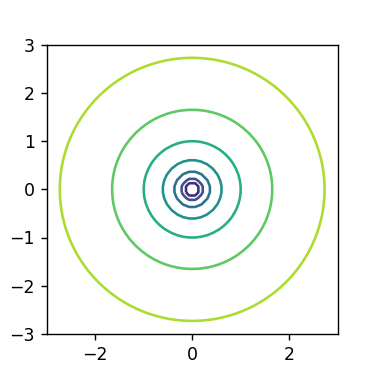

In [10]:
plt.figure(figsize=(3,3))
plt.contour(x, y, phi);

## Streamlines

In [11]:
def src(r, t):
    x, y = r
    x1 = x + 0.5
    r2 = x1*x1 + y*y
    u = x1/(2*pi*r2)
    v = y/(2*pi*r2)
    return np.array([u, v])

def sink(r, t):
    x, y = r
    x1 = x - 0.5
    r2 = x1*x1 + y*y
    u = -x1/(2*pi*r2)
    v = -y/(2*pi*r2)
    return np.array([u, v])


In [12]:
x, y = np.mgrid[-3:3:50j, -3:3:50j]
u, v = src((x, y), 0)
u1, v1 = sink((x, y), 0)

<IPython.core.display.Javascript object>


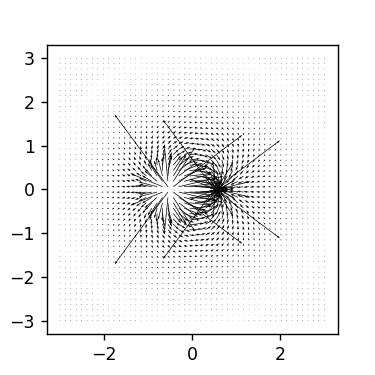

In [13]:
plt.figure(figsize=(3,3))
plt.quiver(x, y, u + u1, v + v1)

## Streamlines

In [14]:
from scipy.integrate import odeint

In [15]:
def flow(r, t):
    return src(r, t) + sink(r, t) + np.array([1, 0])

In [16]:
ic = (-3, 0.5)
t = np.linspace(0, 5, 200)

In [17]:
result = odeint(flow, ic, t)

In [18]:
xr, yr = result.T

<IPython.core.display.Javascript object>


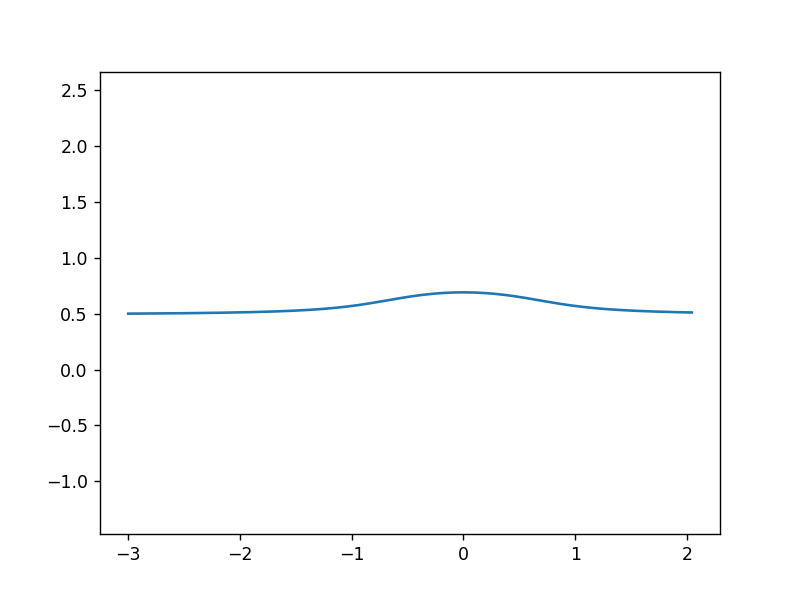

In [19]:
plt.figure()
plt.axis('equal')
plt.plot(xr, yr)

<IPython.core.display.Javascript object>


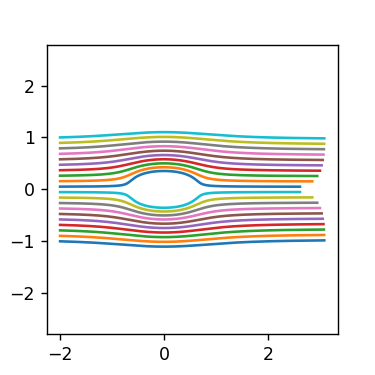

In [20]:
plt.figure(figsize=(3,3))
plt.axis('equal')
for y in np.linspace(-1, 1, 20):
    result = odeint(flow, (-2.0, y), t)
    xr, yr = result.T
    plt.plot(xr, yr)

## Better plots
Let us try to eliminate the singularity so we can integrate it a bit better.

In [21]:
def src(r, t):
    x, y = r
    x1 = x + 0.5
    r2 = x1*x1 + y*y + 0.0001
    u = x1/(2*pi*r2)
    v = y/(2*pi*r2)
    return np.array([u, v])

def sink(r, t):
    x, y = r
    x1 = x - 0.5
    r2 = x1*x1 + y*y + 0.0001
    u = -x1/(2*pi*r2)
    v = -y/(2*pi*r2)
    return np.array([u, v])


def flow(r, t):
    return src(r, t) + sink(r, t) + np.array([1, 0])

<IPython.core.display.Javascript object>


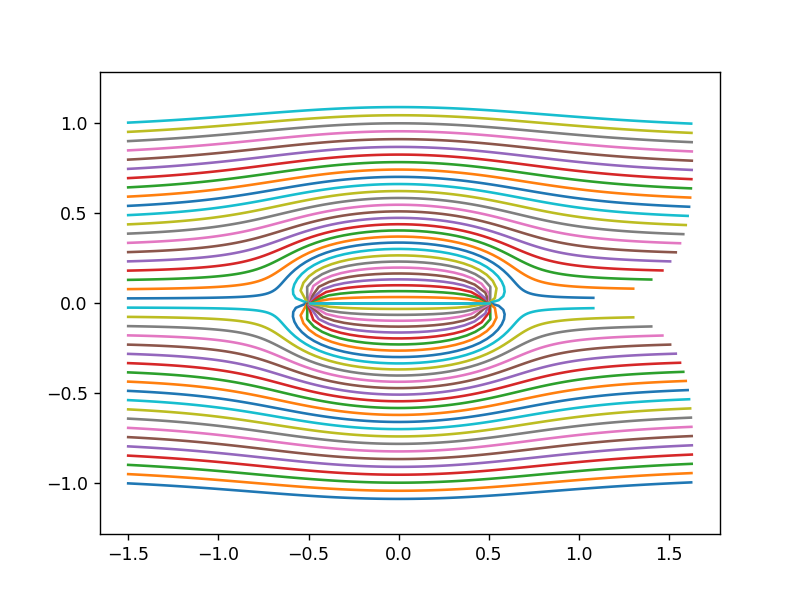

In [22]:
plt.figure()
plt.axis('equal')
xg = -1.5*np.ones(40)
yg = np.linspace(-1,1, 40)
t = np.linspace(0, 3, 100)
for x, y in zip(xg, yg):
    result = odeint(flow, (x, y), t)
    xr, yr = result.T
    plt.plot(xr, yr)

theta = np.linspace(0, 2*pi, 20)
r = 0.01
xg = r*np.cos(theta) - 0.5
yg = r*np.sin(theta)
for x, y in zip(xg, yg):
    result = odeint(flow, (x, y), t)
    xr, yr = result.T
    plt.plot(xr, yr)
